Author: Yash Singh                
Name: MOVIE RATING PREDICTION WITH PYTHON

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score as score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [3]:
movie = pd.read_csv("archive.zip", encoding='latin1')

In [6]:
movie

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
movie.head(15)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [10]:
movie.shape

(15509, 10)

In [12]:
movie.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [14]:
movie.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [16]:
movie.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [18]:
movie.isnull().sum().sum()

33523

In [20]:
movie.dropna(inplace = True)

In [22]:
movie.head(15)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,(2004),96 min,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,(2016),120 min,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,(1991),161 min,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,(2012),166 min,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


In [24]:
movie.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [26]:
movie.isnull().sum().sum()

0

In [28]:
movie.shape

(5659, 10)

In [30]:
movie['Duration'] = movie['Duration'].astype(str)
movie['Duration'] = movie['Duration'].str.extract(r'(\d+)')
movie['Duration'] = pd.to_numeric(movie['Duration'])

In [32]:
movie["Year"].head()

1    (2019)
3    (2019)
5    (1997)
6    (2005)
8    (2012)
Name: Year, dtype: object

In [34]:
genre = movie['Genre']

In [36]:
genre.head(15)

1                         Drama
3               Comedy, Romance
5        Comedy, Drama, Musical
6           Drama, Romance, War
8     Horror, Mystery, Thriller
9       Action, Crime, Thriller
10                        Drama
11                       Horror
12    Horror, Romance, Thriller
13       Comedy, Drama, Romance
15                Comedy, Drama
18       Comedy, Drama, Romance
21        Crime, Drama, Mystery
22             Horror, Thriller
25               Comedy, Horror
Name: Genre, dtype: object

In [38]:
genres = movie['Genre'].str.split(', ', expand=True)

In [40]:
genres.head(15)

,0,1,2
1,Drama,None,None
3,Comedy,Romance,None
5,Comedy,Drama,Musical
6,Drama,Romance,War
8,Horror,Mystery,Thriller
9,Action,Crime,Thriller
10,Drama,None,None
11,Horror,None,None
12,Horror,Romance,Thriller
13,Comedy,Drama,Romance


In [42]:
genre_counts = {}
for genre in genres.values.flatten():
    if genre is not None:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

genereCounts = {genre: count for genre, count in sorted(genre_counts.items())}
for genre, count in genereCounts.items():
    print(f"{genre}: {count}")

Action: 1686
Adventure: 277
Animation: 40
Biography: 115
Comedy: 1344
Crime: 875
Documentary: 48
Drama: 3796
Family: 416
Fantasy: 146
History: 99
Horror: 202
Music: 53
Musical: 412
Mystery: 304
News: 1
Romance: 1380
Sci-Fi: 32
Sport: 40
Thriller: 679
War: 33
Western: 1


In [46]:
genresPie = movie['Genre'].value_counts()

In [48]:
genresPie.head(15)

Genre
Drama                      844
Drama, Romance             332
Action, Crime, Drama       329
Action, Drama              206
Comedy, Drama              205
Comedy, Drama, Romance     188
Comedy                     187
Action                     170
Drama, Family              160
Romance                    126
Action, Comedy, Drama      118
Comedy, Romance            107
Action, Drama, Romance     107
Drama, Musical, Romance     93
Thriller                    84
Name: count, dtype: int64

In [50]:
genrePie = pd.DataFrame(list(genresPie.items()))
genrePie = genrePie.rename(columns={0: 'Genre', 1: 'Count'})

In [52]:
genrePie.head(15)

,Genre,Count
0,Drama,844
1,"Drama, Romance",332
2,"Action, Crime, Drama",329
3,"Action, Drama",206
4,"Comedy, Drama",205
5,"Comedy, Drama, Romance",188
6,Comedy,187
7,Action,170
8,"Drama, Family",160
9,Romance,126


In [54]:
movie['Votes'] = movie['Votes'].str.replace(',', '').astype(int)

In [56]:
movie['Votes'].head(15)

1        8
3       35
5      827
6     1086
8      326
9       11
10      17
11      59
12     983
13     512
15    6619
18     162
21      72
22      63
25      26
Name: Votes, dtype: int32

In [58]:
movie["Director"].nunique()

2431

In [60]:
directors = movie["Director"].value_counts()

In [62]:
directors.head(15)

Director
David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         33
Hrishikesh Mukherjee    33
Shakti Samanta          33
Vikram Bhatt            30
Priyadarshan            29
Basu Chatterjee         23
Rama Rao Tatineni       23
Shyam Benegal           22
Yash Chopra             22
K. Bapaiah              22
Kanti Shah              21
Harmesh Malhotra        21
Shyam Ramsay            20
Name: count, dtype: int64

In [64]:
actors = pd.concat([movie['Actor 1'], movie['Actor 2'], movie['Actor 3']]).dropna().value_counts()

In [66]:
actors.head(15)

Mithun Chakraborty    160
Amitabh Bachchan      148
Dharmendra            146
Ashok Kumar           124
Akshay Kumar          120
Shashi Kapoor         117
Jeetendra             116
Sanjay Dutt           101
Rekha                  92
Ajay Devgn             92
Govinda                90
Rishi Kapoor           88
Naseeruddin Shah       87
Sanjeev Kumar          86
Jackie Shroff          84
Name: count, dtype: int64

In [68]:
sb.set(style = "darkgrid", font = "Arial")

<>:1: SyntaxWarning:

invalid escape sequence '\d'

<>:1: SyntaxWarning:

invalid escape sequence '\d'

C:\Users\sy300\AppData\Local\Temp\ipykernel_27112\2498121080.py:1: SyntaxWarning:

invalid escape sequence '\d'



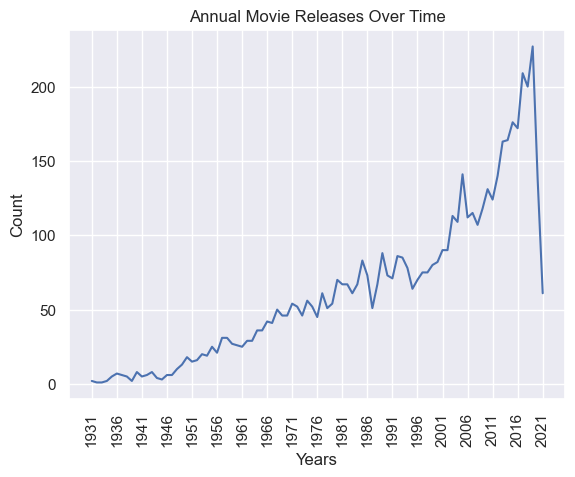

In [140]:
movie['Year'] = movie['Year'].str.extract('(\d{4})').astype(int)
rep = sb.lineplot(data = movie['Year'].value_counts().sort_index())
darkgrid_positions = range(min(movie['Year']), max(movie['Year']) + 1, 5)
rep.set_title("Annual Movie Releases Over Time")
rep.set_xticks(darkgrid_positions)
rep.set_xticklabels(darkgrid_positions, rotation=90)
rep.set_xlabel("Years")
rep.set_ylabel("Count")
plt.show()

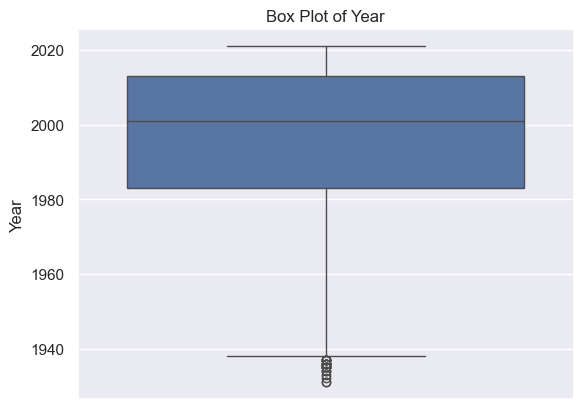

In [144]:
rep = sb.boxplot(data=movie, y='Year')
rep.set_ylabel('Year')
rep.set_title('Box Plot of Year')
plt.show()

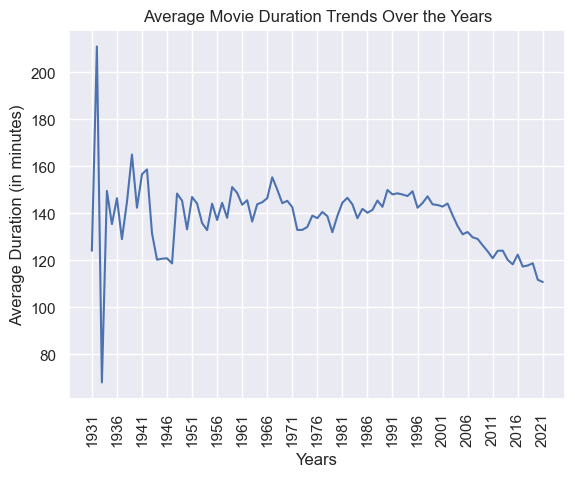

In [146]:
rep = sb.lineplot(data=movie.groupby('Year')['Duration'].mean().reset_index(), x='Year', y='Duration')
rep.set_title("Average Movie Duration Trends Over the Years")
darkgrid_positions = range(min(movie['Year']), max(movie['Year']) + 1, 5)
rep.set_xticks(darkgrid_positions)
plt.xticks(rotation=90)
rep.set_xlabel("Years")
rep.set_ylabel('Average Duration (in minutes)')
plt.show()


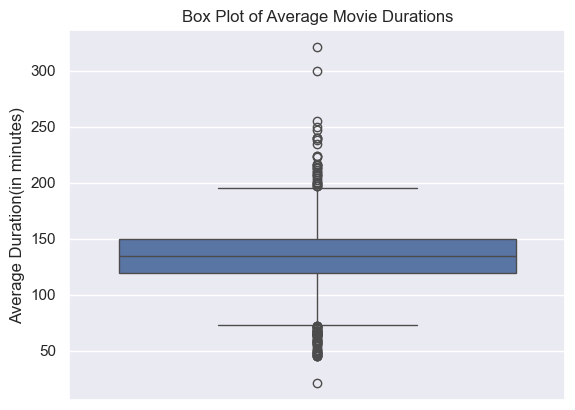

In [148]:
rep = sb.boxplot(data = movie, y = 'Duration')
rep.set_title("Box Plot of Average Movie Durations")
rep.set_ylabel('Average Duration(in minutes)')
plt.show()

In [150]:
q1 = movie['Duration'].quantile(0.25)
q3 = movie['Duration'].quantile(0.75)
QR = q3 - q1
lower_bound = q1 - 1.5 * QR
upper_bound = q3 + 1.5 * QR
df = movie[(movie['Duration'] >= lower_bound) & (movie['Duration'] <= upper_bound)]
df.head(15)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",629,229,3858
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor",1334,184,3326
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1527,157,1112
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",2037,289,2075
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",135,320,5535
9,@Andheri,2014,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,"Augustine, Fathima Babu, Byon",401,37,967
10,1:1.6 An Ode to Lost Love,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,"Rati Agnihotri, Gulshan Grover, Atul Kulkarni",1083,229,3863
11,1:13:7 Ek Tera Saath,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani,"Pankaj Berry, Anubhav Dhir, Hritu Dudani",266,316,3213
12,100 Days,1991,161,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey,"Jackie Shroff, Madhuri Dixit, Javed Jaffrey",1373,323,1890
13,100% Love,2012,166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh,"Jeet, Koyel Mallick, Sujoy Ghosh",1503,159,1971


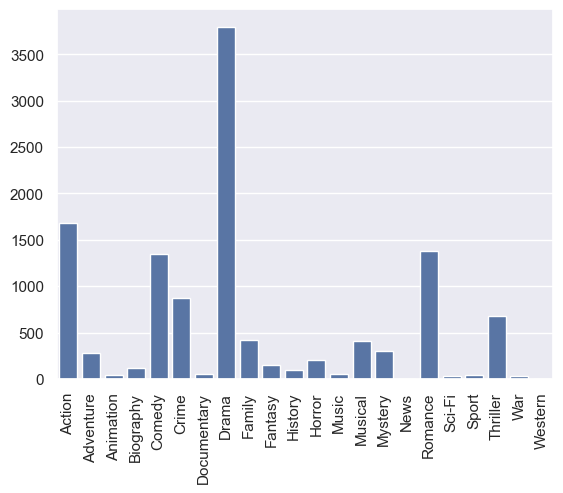

In [152]:
sorted_genre = sorted(genereCounts.items())
genreLabels, genreCounts = zip(*sorted_genre)
rep = sb.barplot(x=genreLabels, y=genreCounts)
plt.xticks(rotation=90)
plt.show()

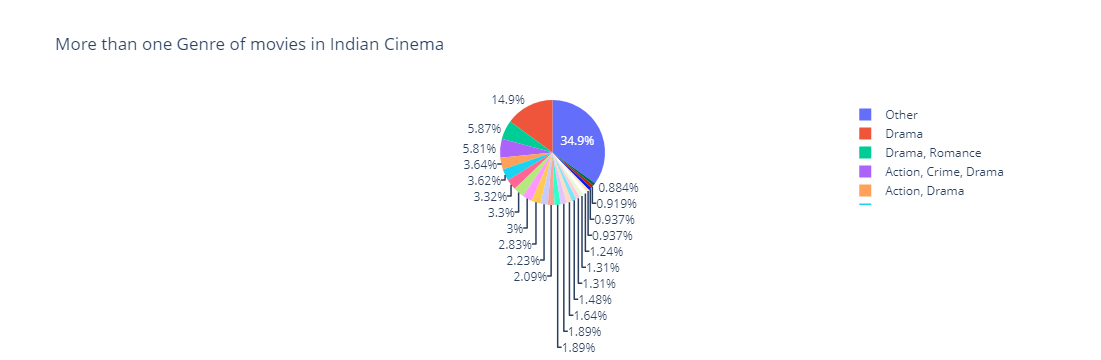

In [154]:
genrePie.loc[genrePie['Count'] < 50, 'Genre'] = 'Other'
rep = px.pie(genrePie, values='Count', names='Genre', title='More than one Genre of movies in Indian Cinema')
rep.show()

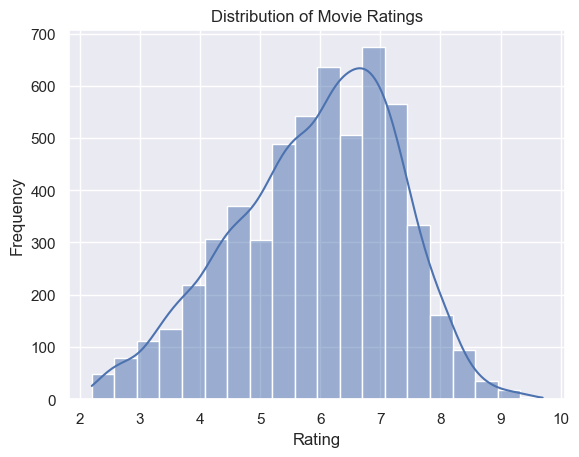

In [156]:
rep = sb.histplot(data = movie, x = "Rating", bins = 20, kde = True)
rep.set_xlabel('Rating')
rep.set_ylabel('Frequency')
rep.set_title('Distribution of Movie Ratings')
plt.show()

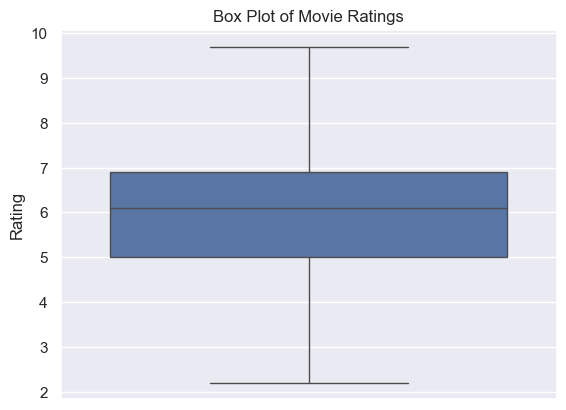

In [158]:
rep = sb.boxplot(data=movie, y='Rating')
rep.set_ylabel('Rating')
rep.set_title('Box Plot of Movie Ratings')
plt.show()

In [160]:
q1 = movie['Rating'].quantile(0.25)
q3 = movie['Rating'].quantile(0.75)
QR = q3 - q1
lower_bound = q1 - 1.5 * QR
upper_bound = q3 + 1.5 * QR
movie = movie[(movie['Rating'] >= lower_bound) & (movie['Rating'] <= upper_bound)]
movie.head(15)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",629,229,3858
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor",1334,184,3326
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1527,157,1112
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",2037,289,2075
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",135,320,5535
9,@Andheri,2014,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,"Augustine, Fathima Babu, Byon",401,37,967
10,1:1.6 An Ode to Lost Love,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,"Rati Agnihotri, Gulshan Grover, Atul Kulkarni",1083,229,3863
11,1:13:7 Ek Tera Saath,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani,"Pankaj Berry, Anubhav Dhir, Hritu Dudani",266,316,3213
12,100 Days,1991,161,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey,"Jackie Shroff, Madhuri Dixit, Javed Jaffrey",1373,323,1890
13,100% Love,2012,166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh,"Jeet, Koyel Mallick, Sujoy Ghosh",1503,159,1971


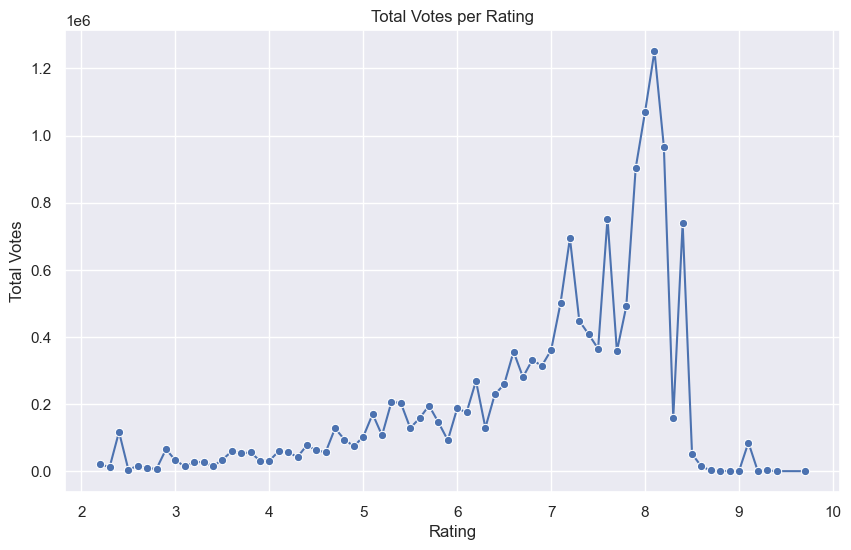

In [162]:
rating_votes = movie.groupby('Rating')['Votes'].sum().reset_index()
plt.figure(figsize=(10, 6))
rep_line_seaborn = sb.lineplot(data=rating_votes, x='Rating', y='Votes', marker='o')
rep_line_seaborn.set_xlabel('Rating')
rep_line_seaborn.set_ylabel('Total Votes')
rep_line_seaborn.set_title('Total Votes per Rating')
plt.show()

C:\Users\sy300\AppData\Local\Temp\ipykernel_27112\1255179639.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




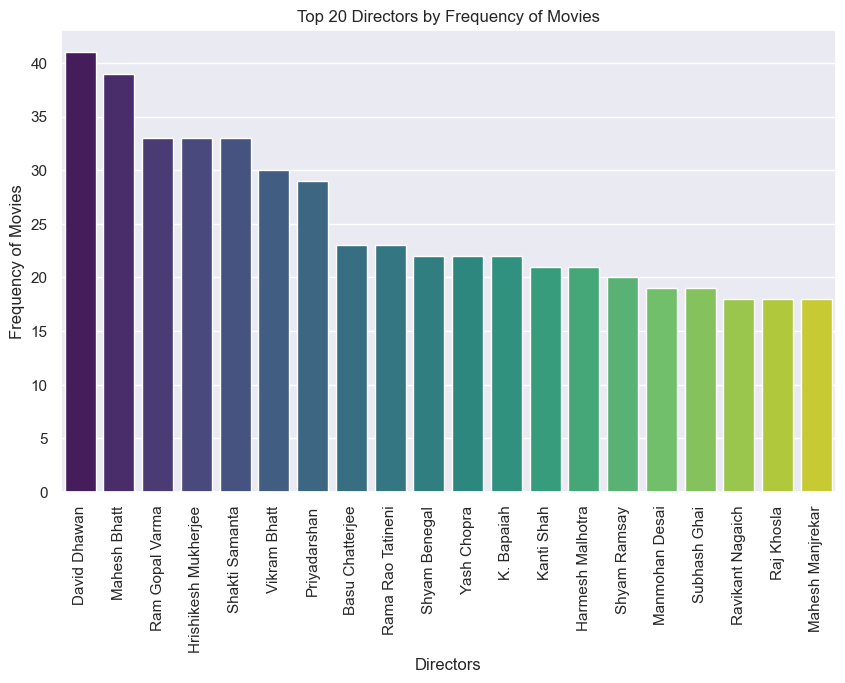

In [164]:
plt.figure(figsize=(10, 6))
rep = sb.barplot(x=directors.head(20).index, y=directors.head(20).values, palette='viridis')
rep.set_xlabel('Directors')
rep.set_ylabel('Frequency of Movies')
rep.set_title('Top 20 Directors by Frequency of Movies')
plt.xticks(rotation=90)
plt.show()

C:\Users\sy300\AppData\Local\Temp\ipykernel_27112\292149390.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\sy300\AppData\Local\Temp\ipykernel_27112\292149390.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



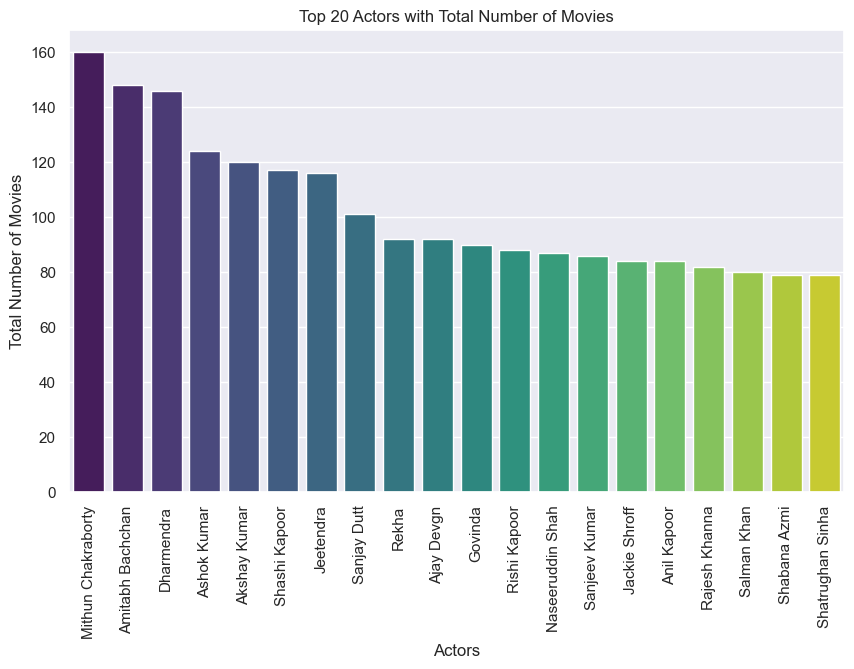

In [166]:
plt.figure(figsize=(10, 6))
rep = sb.barplot(x=actors.head(20).index, y=actors.head(20).values, palette='viridis')
rep.set_xlabel('Actors')
rep.set_ylabel('Total Number of Movies')
rep.set_title('Top 20 Actors with Total Number of Movies')
rep.set_xticklabels(rep.get_xticklabels(), rotation=90)
plt.show()

In [168]:
movie["Actor"] = movie['Actor 1'] + ', ' + movie['Actor 2'] + ', ' + movie['Actor 3']
movie["Directors"] = movie['Director'].astype('category').cat.codes
movie["Genres"] = movie['Genre'].astype('category').cat.codes
movie["Actors"] = movie['Actor'].astype('category').cat.codes

In [170]:
movie.head(15)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",629,229,3858
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor",1334,184,3326
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1527,157,1112
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",2037,289,2075
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",135,320,5535
9,@Andheri,2014,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,"Augustine, Fathima Babu, Byon",401,37,967
10,1:1.6 An Ode to Lost Love,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,"Rati Agnihotri, Gulshan Grover, Atul Kulkarni",1083,229,3863
11,1:13:7 Ek Tera Saath,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani,"Pankaj Berry, Anubhav Dhir, Hritu Dudani",266,316,3213
12,100 Days,1991,161,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey,"Jackie Shroff, Madhuri Dixit, Javed Jaffrey",1373,323,1890
13,100% Love,2012,166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh,"Jeet, Koyel Mallick, Sujoy Ghosh",1503,159,1971


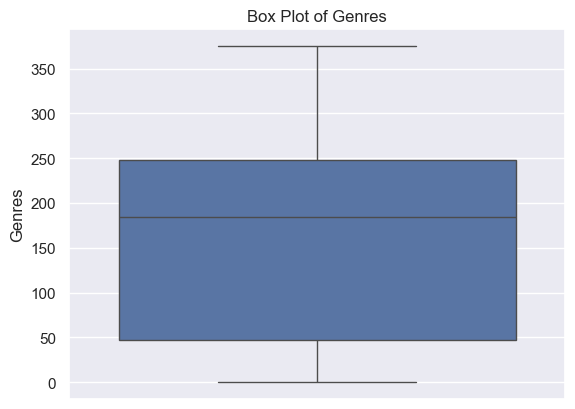

In [172]:
rep = sb.boxplot(data = movie, y = 'Genres')
rep.set_ylabel('Genres')
rep.set_title('Box Plot of Genres')
plt.show()

In [174]:
q1 = movie['Genres'].quantile(0.25)
q3 = movie['Genres'].quantile(0.75)
QR = q3 - q1
lower_bound = q1 - 1.5 * QR
upper_bound = q3 + 1.5 * QR
movie = movie[(movie['Genres'] >= lower_bound) & (movie['Genres'] <= upper_bound)]

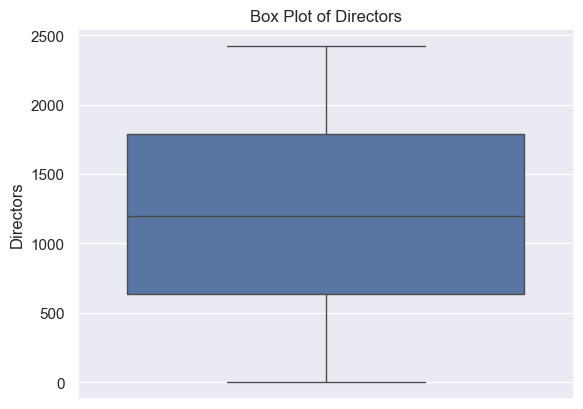

In [176]:
rep = sb.boxplot(data = movie, y = 'Directors')
rep.set_ylabel('Directors')
rep.set_title('Box Plot of Directors')
plt.show()

In [178]:
movie.head(15)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",629,229,3858
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor",1334,184,3326
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1527,157,1112
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",2037,289,2075
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",135,320,5535
9,@Andheri,2014,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,"Augustine, Fathima Babu, Byon",401,37,967
10,1:1.6 An Ode to Lost Love,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,"Rati Agnihotri, Gulshan Grover, Atul Kulkarni",1083,229,3863
11,1:13:7 Ek Tera Saath,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani,"Pankaj Berry, Anubhav Dhir, Hritu Dudani",266,316,3213
12,100 Days,1991,161,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey,"Jackie Shroff, Madhuri Dixit, Javed Jaffrey",1373,323,1890
13,100% Love,2012,166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh,"Jeet, Koyel Mallick, Sujoy Ghosh",1503,159,1971


In [180]:
q1 = movie['Directors'].quantile(0.25)
q3 = movie['Directors'].quantile(0.75)
QR = q3 - q1
lower_bound = q1 - 1.5 * QR
upper_bound = q3 + 1.5 * QR
movie = movie[(movie['Directors'] >= lower_bound) & (movie['Directors'] <= upper_bound)]

In [182]:
movie.head(15)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",629,229,3858
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor",1334,184,3326
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1527,157,1112
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",2037,289,2075
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",135,320,5535
9,@Andheri,2014,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,"Augustine, Fathima Babu, Byon",401,37,967
10,1:1.6 An Ode to Lost Love,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,"Rati Agnihotri, Gulshan Grover, Atul Kulkarni",1083,229,3863
11,1:13:7 Ek Tera Saath,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani,"Pankaj Berry, Anubhav Dhir, Hritu Dudani",266,316,3213
12,100 Days,1991,161,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey,"Jackie Shroff, Madhuri Dixit, Javed Jaffrey",1373,323,1890
13,100% Love,2012,166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh,"Jeet, Koyel Mallick, Sujoy Ghosh",1503,159,1971


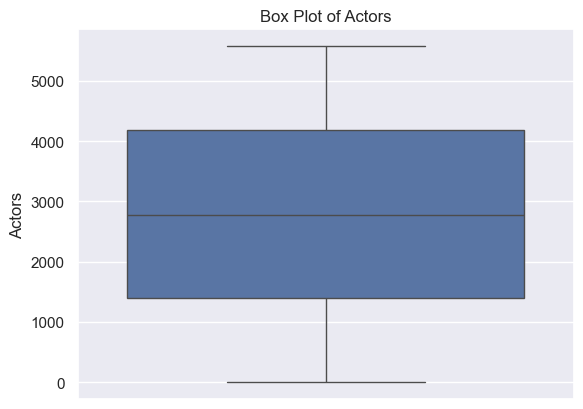

In [184]:
rep = sb.boxplot(data = movie, y = 'Actors')
rep.set_ylabel('Actors')
rep.set_title('Box Plot of Actors')
plt.show()


In [186]:
q1 = movie['Actors'].quantile(0.25)
q3 = movie['Actors'].quantile(0.75)
QR = q3 - q1
lower_bound = q1 - 1.5 * QR
upper_bound = q3 + 1.5 * QR
movie = movie[(movie['Actors'] >= lower_bound) & (movie['Actors'] <= upper_bound)]

In [188]:
movie.head(15)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",629,229,3858
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor",1334,184,3326
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1527,157,1112
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",2037,289,2075
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",135,320,5535
9,@Andheri,2014,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,"Augustine, Fathima Babu, Byon",401,37,967
10,1:1.6 An Ode to Lost Love,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,"Rati Agnihotri, Gulshan Grover, Atul Kulkarni",1083,229,3863
11,1:13:7 Ek Tera Saath,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani,"Pankaj Berry, Anubhav Dhir, Hritu Dudani",266,316,3213
12,100 Days,1991,161,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey,"Jackie Shroff, Madhuri Dixit, Javed Jaffrey",1373,323,1890
13,100% Love,2012,166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh,"Jeet, Koyel Mallick, Sujoy Ghosh",1503,159,1971


In [190]:
In = movie.drop(['Name', 'Genre', 'Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Actor'], axis=1)
Out = movie['Rating']

In [192]:
In.head(15)

,Year,Duration,Votes,Directors,Genres,Actors
1,2019,109,8,629,229,3858
3,2019,110,35,1334,184,3326
5,1997,147,827,1527,157,1112
6,2005,142,1086,2037,289,2075
8,2012,82,326,135,320,5535
9,2014,116,11,401,37,967
10,2004,96,17,1083,229,3863
11,2016,120,59,266,316,3213
12,1991,161,983,1373,323,1890
13,2012,166,512,1503,159,1971


In [194]:
Out.head(15)

1     7.0
3     4.4
5     4.7
6     7.4
8     5.6
9     4.0
10    6.2
11    5.9
12    6.5
13    5.7
15    7.4
18    6.3
21    7.2
22    4.4
25    6.6
Name: Rating, dtype: float64

In [196]:
x_train, x_test, y_train, y_test = train_test_split(In, Out, test_size = 0.2, random_state = 1)

In [198]:
def evaluate_model(y_true, y_pred, model_name):
    print("Model: ", model_name)
    print("R^2 Score = {:0.2f}".format(score(y_true, y_pred)))
    print("Mean Squared Error = {:0.2f}".format(mean_squared_error(y_true, y_pred, squared=False)))
    return round(score(y_true, y_pred), 2)

In [200]:
LR = LinearRegression()
LR.fit(x_train, y_train)
lr_preds = LR.predict(x_test)

RFR = RandomForestRegressor(n_estimators=100, random_state=1)
RFR.fit(x_train, y_train)
rf_preds = RFR.predict(x_test)

DTR = DecisionTreeRegressor(random_state=1)
DTR.fit(x_train, y_train)
dt_preds = DTR.predict(x_test)

XGBR = XGBRegressor(n_estimators=100, random_state=1)
XGBR.fit(x_train, y_train)
xgb_preds = XGBR.predict(x_test)

GBR = GradientBoostingRegressor(n_estimators=100, random_state=60)
GBR.fit(x_train, y_train)
gb_preds = GBR.predict(x_test)

LGBMR = LGBMRegressor(n_estimators=100, random_state=60)
LGBMR.fit(x_train, y_train)
lgbm_preds = LGBMR.predict(x_test)

CBR = CatBoostRegressor(n_estimators=100, random_state=1, verbose=False)
CBR.fit(x_train, y_train)
catboost_preds = CBR.predict(x_test)

KNR = KNeighborsRegressor(n_neighbors=5)
KNR.fit(x_train, y_train)
knn_preds = KNR.predict(x_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000594 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1209
[LightGBM] [Info] Number of data points in the train set: 4505, number of used features: 6
[LightGBM] [Info] Start training from score 5.919156


In [201]:
LRScore = evaluate_model(y_test, lr_preds, "LINEAR REGRESSION")
RFScore = evaluate_model(y_test, rf_preds, "RANDOM FOREST")
DTScore = evaluate_model(y_test, dt_preds, "DECEISION TREE")
XGBScore = evaluate_model(y_test, xgb_preds, "EXTENDED GRADIENT BOOSTING")
GBScore = evaluate_model(y_test, gb_preds, "GRADIENT BOOSTING")
LGBScore = evaluate_model(y_test, lgbm_preds, "LIGHT GRADIENT BOOSTING")
CBRScore = evaluate_model(y_test, catboost_preds, "CAT BOOST")
KNNScore = evaluate_model(y_test, knn_preds, "K NEAREST NEIGHBORS")

Model:  LINEAR REGRESSION
R^2 Score = -0.06
Mean Squared Error = 1.39
Model:  RANDOM FOREST
R^2 Score = 0.35
Mean Squared Error = 1.09
Model:  DECEISION TREE
R^2 Score = -0.28
Mean Squared Error = 1.53
Model:  EXTENDED GRADIENT BOOSTING
R^2 Score = 0.32
Mean Squared Error = 1.12
Model:  GRADIENT BOOSTING
R^2 Score = 0.38
Mean Squared Error = 1.06
Model:  LIGHT GRADIENT BOOSTING
R^2 Score = 0.38
Mean Squared Error = 1.06
Model:  CAT BOOST
R^2 Score = 0.36
Mean Squared Error = 1.08
Model:  K NEAREST NEIGHBORS
R^2 Score = 0.03
Mean Squared Error = 1.33


C:\Users\sy300\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

C:\Users\sy300\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

C:\Users\sy300\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

C:\Users\sy300\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

C:\Users

In [202]:
models = pd.DataFrame(
    {
        "MODELS": ["Linear Regression", "Random Forest", "Decision Tree", "Gradient Boosting", "Extended Gradient Boosting", "Light Gradient Boosting", "Cat Boosting", "K Nearest Neighbors"],
        "SCORES": ["LRScore", "RFScore", "DTScore", "GBScore", "XGBScore", "LGBScore", "CBRScore", "KNNScore"]
    }
)
models.sort_values(by='SCORES', ascending=False)

,MODELS,SCORES
4,Extended Gradient Boosting,XGBScore
1,Random Forest,RFScore
0,Linear Regression,LRScore
5,Light Gradient Boosting,LGBScore
7,K Nearest Neighbors,KNNScore
3,Gradient Boosting,GBScore
2,Decision Tree,DTScore
6,Cat Boosting,CBRScore
